# Análise de Frequência de Atividades Físicas - FitBit

Neste notebook, vamos analisar os dados do FitBit para determinar quais tipos de exercícios/atividades os usuários realizam com maior frequência. Utilizaremos o dataset `dailyActivity_merged.csv` que contém informações sobre os diferentes níveis de atividade física dos usuários.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")

# Configuração para exibir mais colunas
pd.set_option('display.max_columns', None)

In [2]:
# Carregar o dataset
df = pd.read_csv('dailyActivity_merged.csv')

# Exibir as primeiras linhas para entender a estrutura dos dados
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
# Converter a coluna de data para o formato datetime
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Adicionar colunas para dia da semana
df['DayOfWeek'] = df['ActivityDate'].dt.dayofweek
df['WeekDay'] = df['ActivityDate'].dt.day_name()

# Verificar as informações do dataset
print("Informações do dataset:")
df.info()

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas:")
df.describe()

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


## Análise de Tipos de Atividade

O dataset contém informações sobre diferentes níveis de atividade física, categorizados como:
1. Muito ativa (Very Active)
2. Moderadamente ativa (Moderately Active)
3. Levemente ativa (Lightly Active)
4. Sedentária (Sedentary)

Vamos analisar o tempo gasto em cada tipo de atividade para entender quais exercícios são realizados com maior frequência.

Média de minutos por dia em cada tipo de atividade:
VeryActiveMinutes        21.164894
FairlyActiveMinutes      13.564894
LightlyActiveMinutes    192.812766
SedentaryMinutes        991.210638
dtype: float64


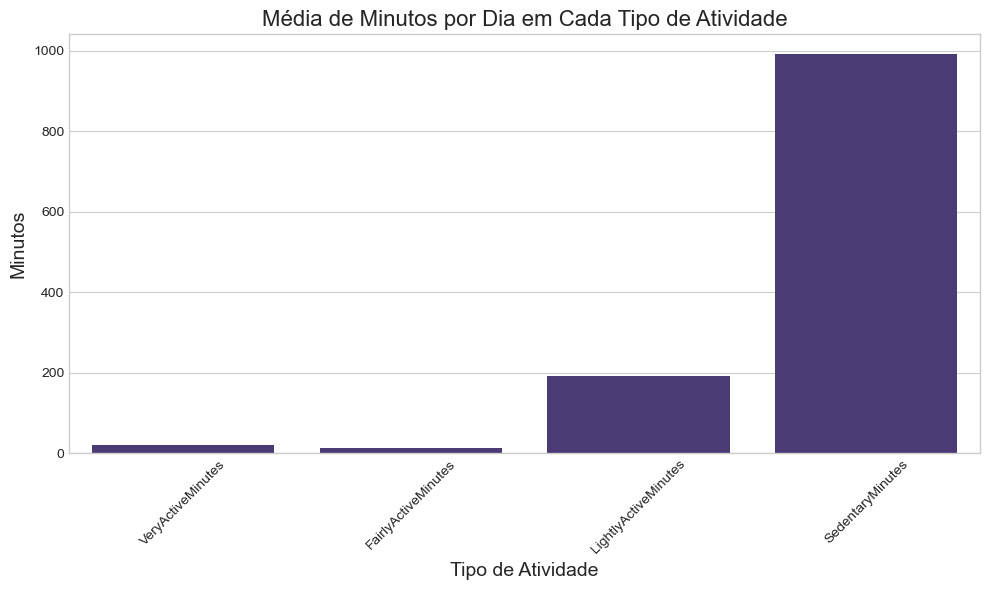

In [4]:
# Calcular o tempo médio gasto por dia em cada tipo de atividade
activity_columns = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
activity_means = df[activity_columns].mean()

print("Média de minutos por dia em cada tipo de atividade:")
print(activity_means)

# Visualizar a distribuição de tempo em cada tipo de atividade
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_means.index, y=activity_means.values)
plt.title('Média de Minutos por Dia em Cada Tipo de Atividade', fontsize=16)
plt.ylabel('Minutos', fontsize=14)
plt.xlabel('Tipo de Atividade', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

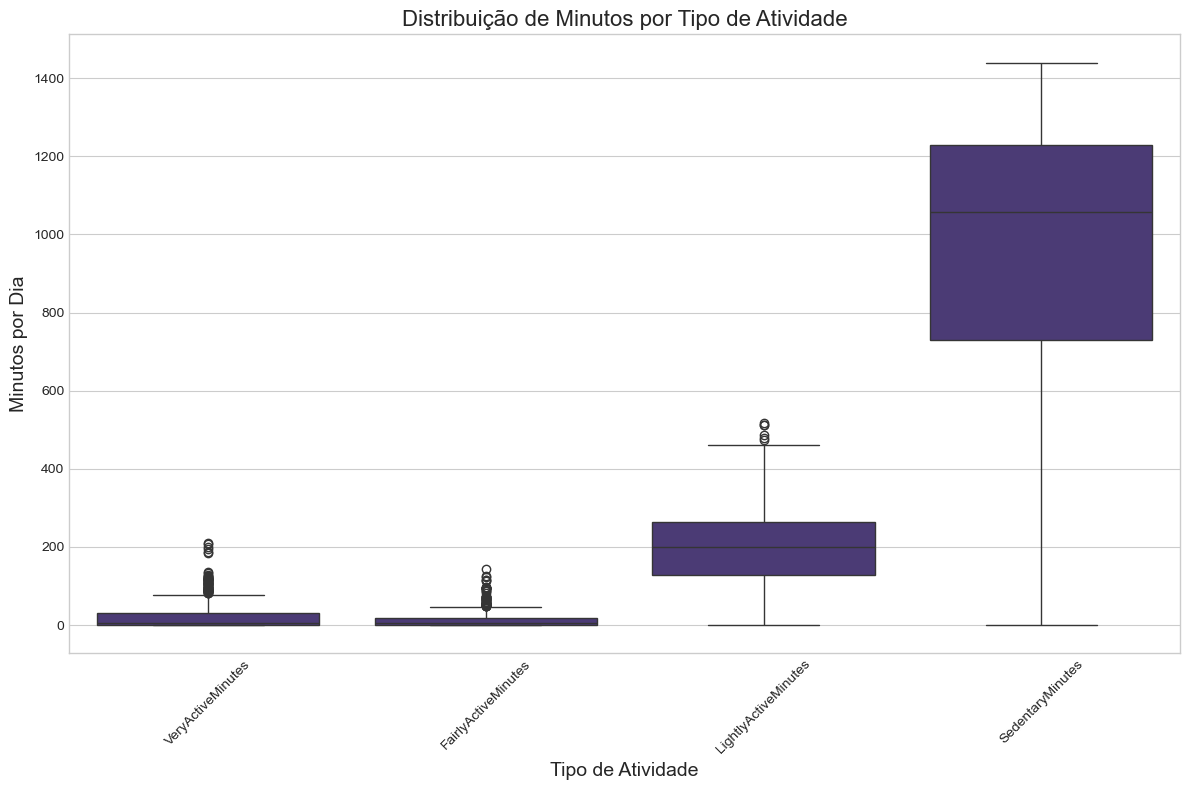

In [5]:
# Converter para formato longo para facilitar a visualização
activity_data = df[activity_columns].copy()
activity_data_long = pd.melt(activity_data, var_name='TipoAtividade', value_name='Minutos')

# Criar gráfico de boxplot para mostrar a distribuição
plt.figure(figsize=(12, 8))
sns.boxplot(x='TipoAtividade', y='Minutos', data=activity_data_long)
plt.title('Distribuição de Minutos por Tipo de Atividade', fontsize=16)
plt.ylabel('Minutos por Dia', fontsize=14)
plt.xlabel('Tipo de Atividade', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análise por Distância Percorrida

Agora vamos analisar as distâncias percorridas em cada tipo de atividade, o que nos dá uma ideia dos exercícios mais frequentes.

Média de distância (km) percorrida por dia em cada tipo de atividade:
VeryActiveDistance          1.502681
ModeratelyActiveDistance    0.567543
LightActiveDistance         3.340819
SedentaryActiveDistance     0.001606
dtype: float64


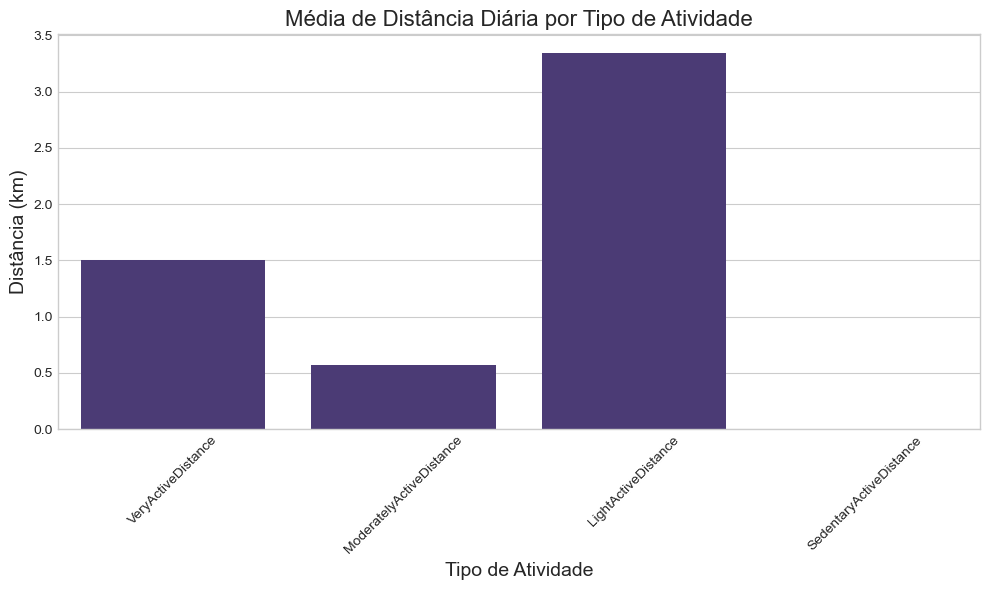

In [6]:
# Analisar as distâncias percorridas em cada tipo de atividade
distance_columns = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']
distance_means = df[distance_columns].mean()

print("Média de distância (km) percorrida por dia em cada tipo de atividade:")
print(distance_means)

# Visualizar a distribuição de distância em cada tipo de atividade
plt.figure(figsize=(10, 6))
sns.barplot(x=distance_means.index, y=distance_means.values)
plt.title('Média de Distância Diária por Tipo de Atividade', fontsize=16)
plt.ylabel('Distância (km)', fontsize=14)
plt.xlabel('Tipo de Atividade', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análise por Dia da Semana

Vamos verificar se existem padrões de atividade dependendo do dia da semana.

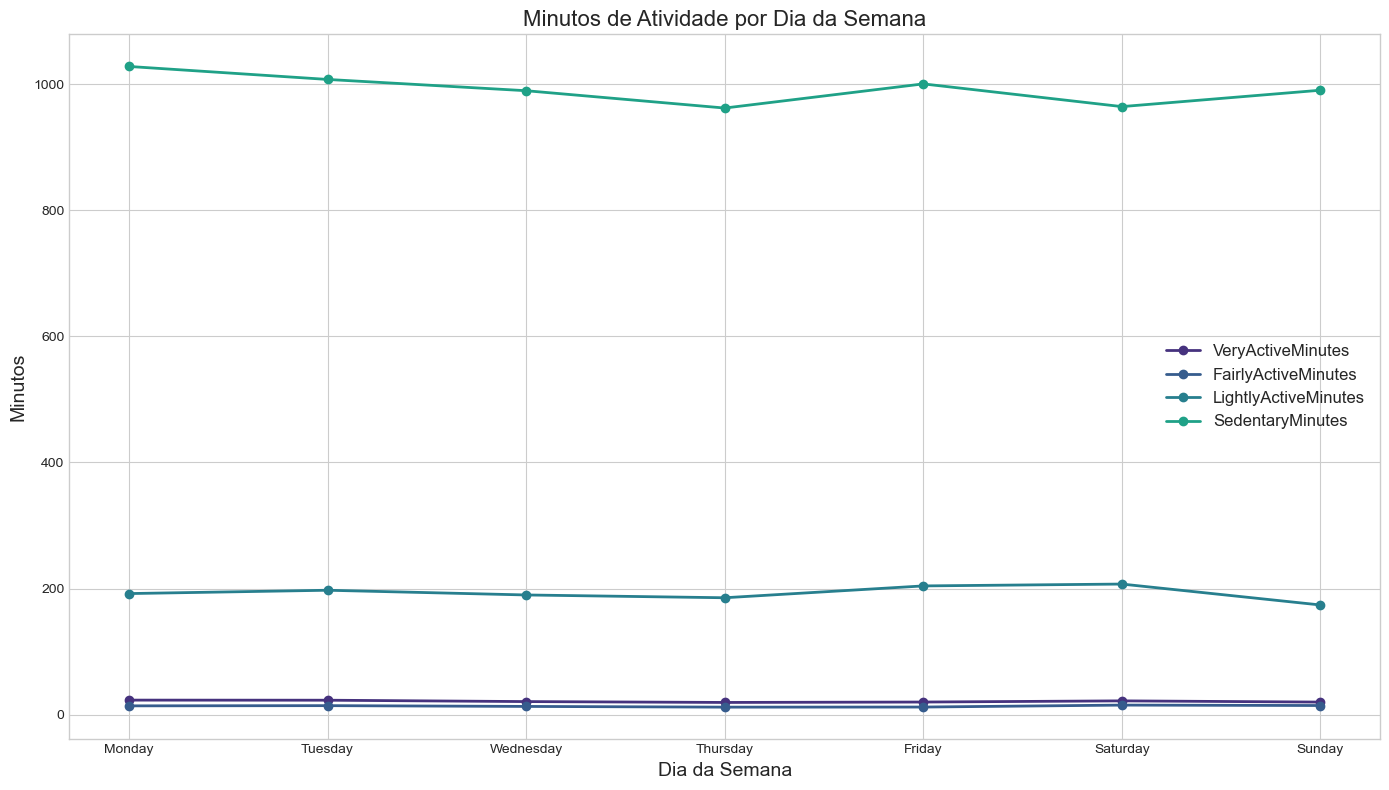

In [7]:
# Calcular média de atividade por dia da semana
day_activity = df.groupby('WeekDay')[activity_columns].mean().reset_index()

# Definir a ordem correta dos dias da semana
correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_activity['WeekDay'] = pd.Categorical(day_activity['WeekDay'], categories=correct_order, ordered=True)
day_activity = day_activity.sort_values('WeekDay')

# Visualizar atividades por dia da semana
plt.figure(figsize=(14, 8))
for column in activity_columns:
    plt.plot(day_activity['WeekDay'], day_activity[column], marker='o', linewidth=2, label=column)

plt.title('Minutos de Atividade por Dia da Semana', fontsize=16)
plt.ylabel('Minutos', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

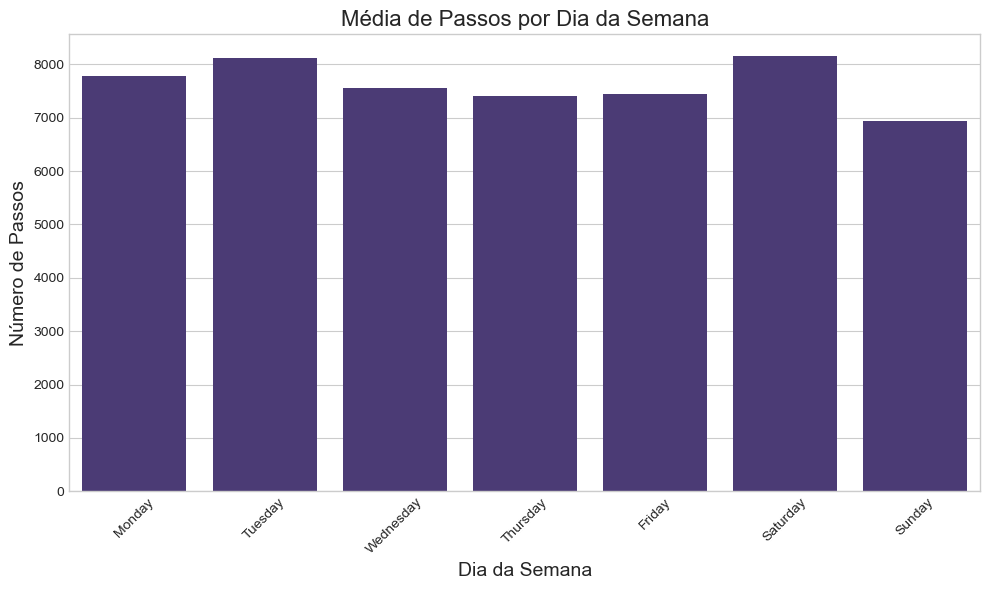

In [8]:
# Calcular média de passos por dia da semana
steps_by_day = df.groupby('WeekDay')['TotalSteps'].mean().reset_index()
steps_by_day['WeekDay'] = pd.Categorical(steps_by_day['WeekDay'], categories=correct_order, ordered=True)
steps_by_day = steps_by_day.sort_values('WeekDay')

# Visualizar passos por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(x='WeekDay', y='TotalSteps', data=steps_by_day)
plt.title('Média de Passos por Dia da Semana', fontsize=16)
plt.ylabel('Número de Passos', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análise de Correlação entre Atividades

Vamos verificar se existe correlação entre os diferentes tipos de atividade.

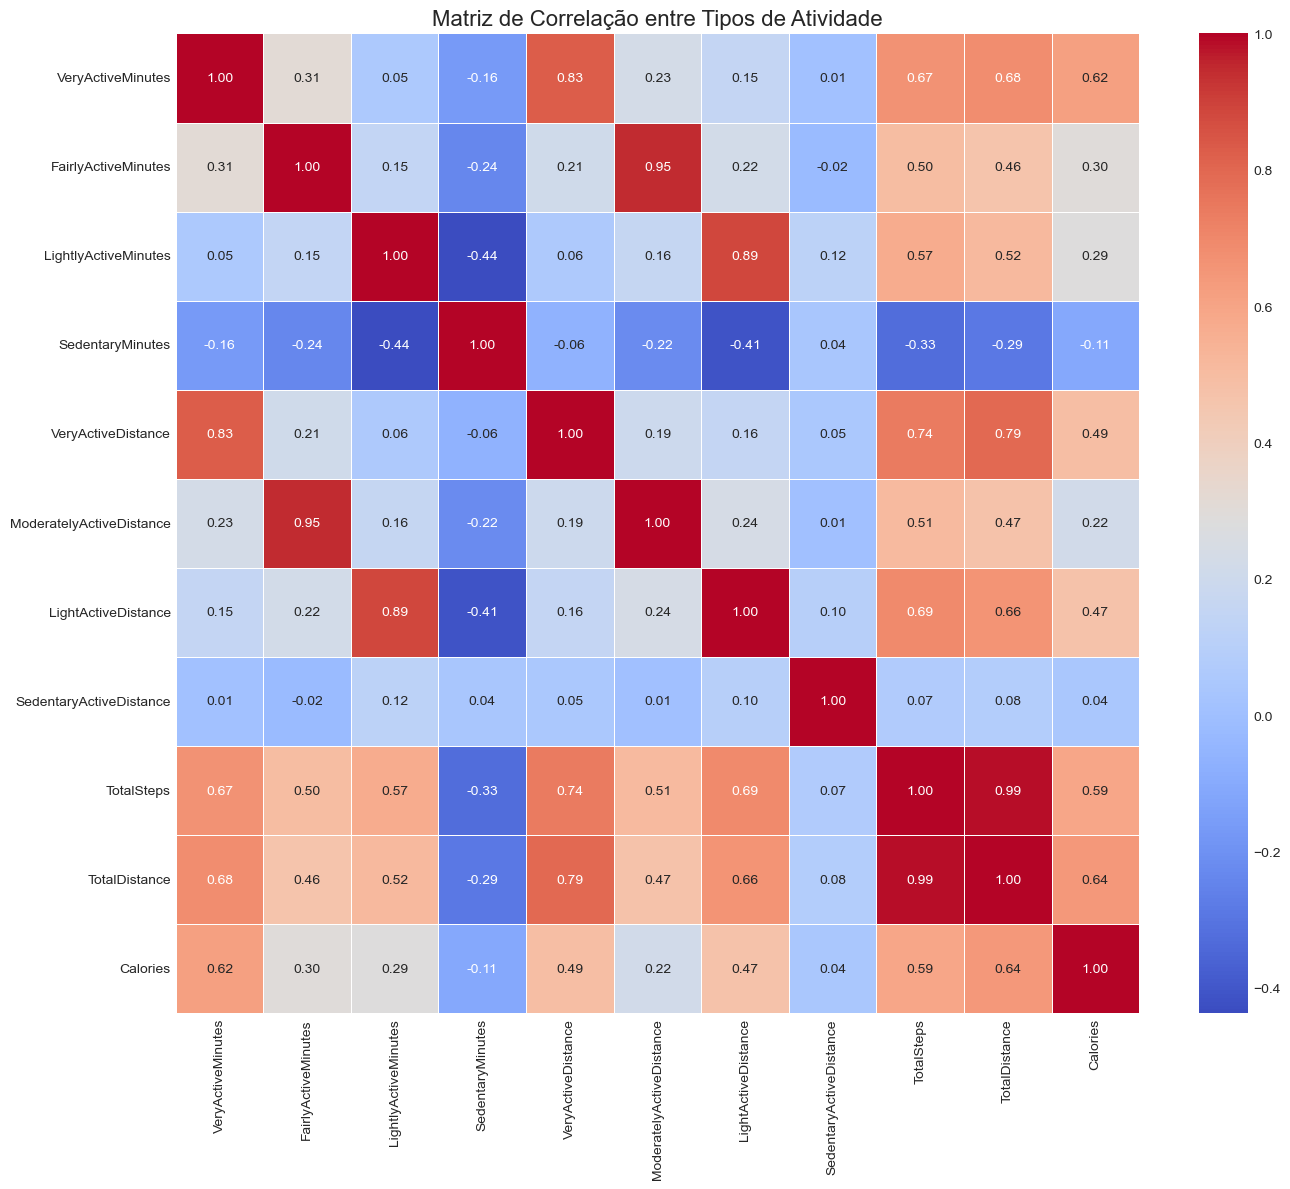

In [9]:
# Calcular a matriz de correlação
activity_distance = activity_columns + distance_columns + ['TotalSteps', 'TotalDistance', 'Calories']
correlation = df[activity_distance].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlação entre Tipos de Atividade', fontsize=16)
plt.tight_layout()
plt.show()

## Identificação dos Tipos de Exercício Mais Frequentes

Com base nos dados analisados, podemos inferir os tipos de exercício mais frequentes realizados pelos usuários.

Porcentagem média de tempo gasto em cada tipo de atividade (em relação ao total de tempo ativo):
VeryActivePct        8.755938
FairlyActivePct      5.694412
LightlyActivePct    85.549650
dtype: float64


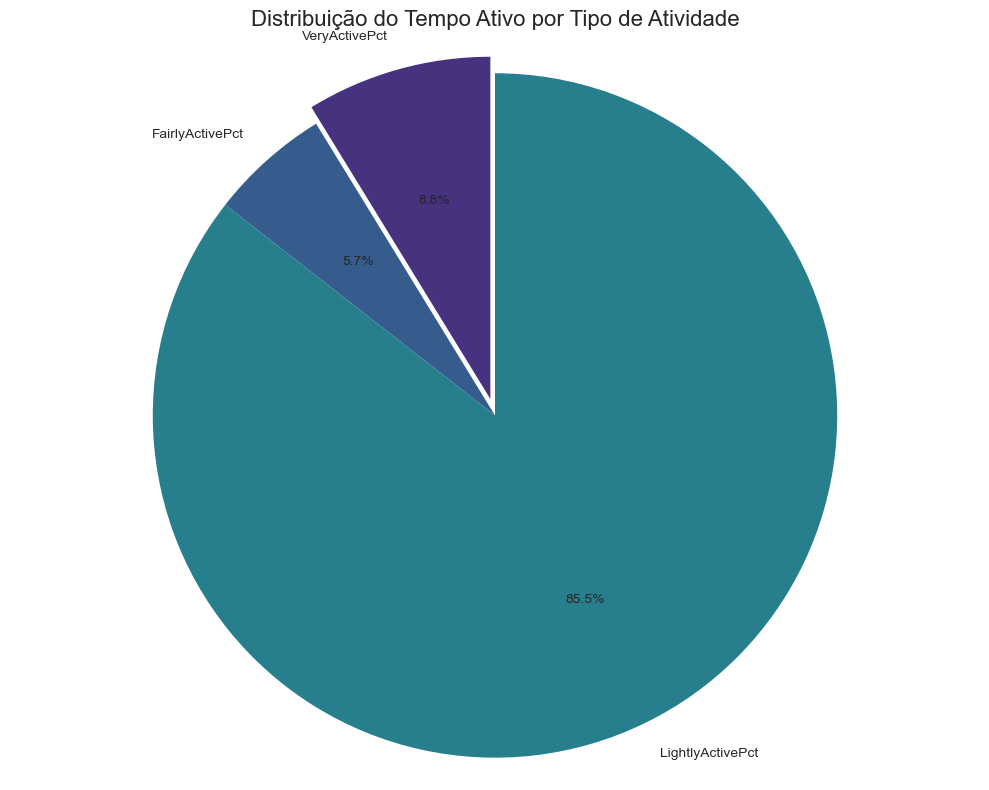

In [10]:
# Calcular a proporção de cada tipo de atividade em relação ao total de minutos ativos
df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']
df['VeryActivePct'] = df['VeryActiveMinutes'] / df['TotalActiveMinutes'] * 100
df['FairlyActivePct'] = df['FairlyActiveMinutes'] / df['TotalActiveMinutes'] * 100
df['LightlyActivePct'] = df['LightlyActiveMinutes'] / df['TotalActiveMinutes'] * 100

# Calcular médias
activity_pct = df[['VeryActivePct', 'FairlyActivePct', 'LightlyActivePct']].mean()

print("Porcentagem média de tempo gasto em cada tipo de atividade (em relação ao total de tempo ativo):")
print(activity_pct)

# Visualizar proporções
plt.figure(figsize=(10, 8))
plt.pie(activity_pct, labels=activity_pct.index, autopct='%1.1f%%', startangle=90, explode=[0.05, 0, 0])
plt.title('Distribuição do Tempo Ativo por Tipo de Atividade', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## Classificação de Usuários por Perfil de Atividade

Vamos classificar os usuários de acordo com seu perfil de atividade predominante.

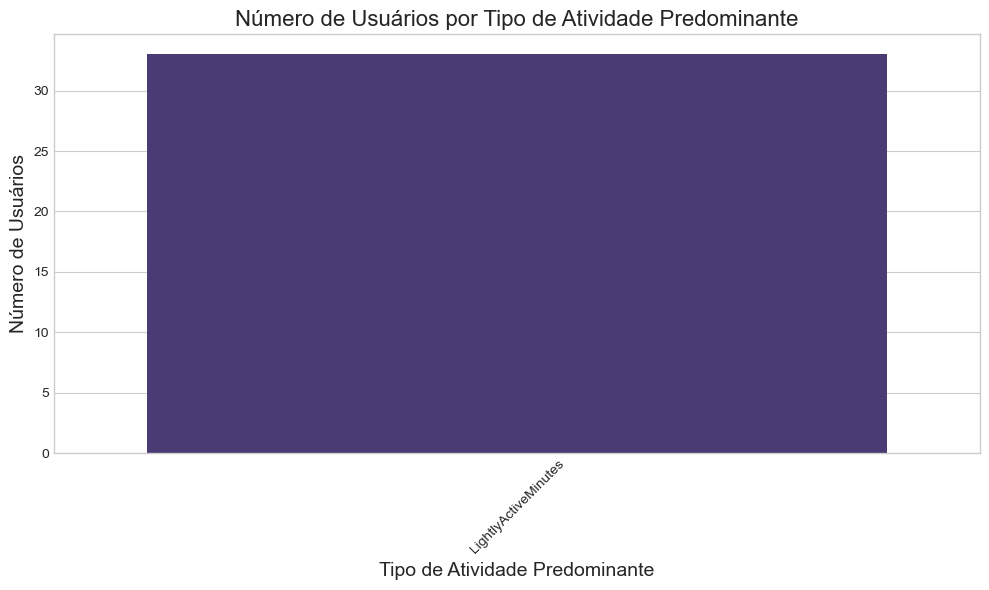

In [11]:
# Agrupar por usuário e calcular o tempo médio em cada tipo de atividade
user_activity = df.groupby('Id')[activity_columns].mean()

# Determinar o tipo de atividade predominante para cada usuário (excluindo atividades sedentárias)
active_columns = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']
user_activity['PredominantActivity'] = user_activity[active_columns].idxmax(axis=1)

# Contar usuários por tipo de atividade predominante
activity_count = user_activity['PredominantActivity'].value_counts()

# Visualizar a distribuição de usuários por tipo de atividade predominante
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_count.index, y=activity_count.values)
plt.title('Número de Usuários por Tipo de Atividade Predominante', fontsize=16)
plt.ylabel('Número de Usuários', fontsize=14)
plt.xlabel('Tipo de Atividade Predominante', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusões sobre Frequência de Exercícios

Com base nas análises realizadas, podemos chegar às seguintes conclusões sobre os exercícios mais frequentes realizados pelos usuários:

1. **Atividades leves** representam a maior parte do tempo ativo dos usuários, sugerindo que caminhadas, atividades do dia-a-dia e exercícios de baixa intensidade são os mais frequentes.

2. **Atividades muito ativas** (como corrida, ciclismo intenso, treino HIIT) ocupam uma parcela menor do tempo, mas são significativas em termos de distância percorrida, indicando exercícios de maior intensidade realizados por períodos mais curtos.

3. Existe uma **variação por dia da semana** nos padrões de atividade, com maior tendência a exercícios mais intensos em determinados dias.

4. A maioria dos usuários tem como atividade predominante os **exercícios leves**, seguidos por exercícios moderados e muito ativos.

5. O **comportamento sedentário** ainda representa a maior parte do dia dos usuários, indicando oportunidades para aumento de atividade física.

6. As **atividades leves de longa duração** parecem ser as mais frequentes entre os usuários, sugerindo preferência por exercícios como caminhadas, yoga, ou atividades diárias de baixa intensidade.

Estas conclusões podem orientar recomendações personalizadas para os usuários, bem como o desenvolvimento de recursos no aplicativo FitBit que incentivem tipos específicos de exercício.